In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import json
import random
from config import owm_api_key
plt.style.use('seaborn')

In [2]:
# Gather 500 unique cities randomly
########NEED TO REMOVE DUPS!###########

cities = pd.DataFrame({
    "City":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[]
})

city_names = []
country_codes = []
lats = []
lngs = []

for i in range(0, 10):
    lat = random.uniform(-90, 90)
    lng = random.uniform(-180, 180)
    location = (lat, lng)
    city = citipy.nearest_city(lat, lng)
    city_name = city.city_name
    country_code = city.country_code
    
    city_names.append(city_name)
    country_codes.append(country_code)
    lats.append(lat)
    lngs.append(lng)

cities["City"] = city_names
cities["Country"] = country_codes
cities["Latitude"] = lats
cities["Longitude"] = lngs
cities.head()

,City,Country,Latitude,Longitude
0,mergui,mm,11.630521,98.627505
1,mataura,pf,-86.528193,-157.238227
2,norman wells,ca,74.491104,-119.280961
3,airai,pw,11.571790,137.588948
4,punta arenas,cl,-65.178682,-85.492823


In [3]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

base_url = "https://api.openweathermap.org/data/2.5/weather"
responses = []
i = 0

for index, row in cities.iterrows():
    i = i+1
    city_name = row["City"]
    country_code = row["Country"]
    params = {
        "q":f"{city_name},{country_code}",
        "appid":owm_api_key,
        "units":"imperial"
    }
    print(f"Retrieving data for city #{i} ({city_name}, {country_code})...")
    print(f"{base_url}?q={city_name},{country_code}&units=imperial&appid=**********************")
    response = requests.get(base_url, params=params).json()    
    responses.append(response)    

Making request #1 for mergui, mm...
https://api.openweathermap.org/data/2.5/weather?q=mergui,mm&units=imperial&appid=**********************
Making request #2 for mataura, pf...
https://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=imperial&appid=**********************
Making request #3 for norman wells, ca...
https://api.openweathermap.org/data/2.5/weather?q=norman wells,ca&units=imperial&appid=**********************
Making request #4 for airai, pw...
https://api.openweathermap.org/data/2.5/weather?q=airai,pw&units=imperial&appid=**********************
Making request #5 for punta arenas, cl...
https://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&appid=**********************
Making request #6 for nanortalik, gl...
https://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&appid=**********************
Making request #7 for rikitea, pf...
https://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=*********

In [4]:
cities["Temperature (F)"] = ""
cities["Humidity (%)"] = ""
cities["Cloudiness (%)"] = ""
cities["Wind Speed (mph)"] = ""

temps = []
humidities = []
clouds = []
winds = []
i = 0

for response in responses:
    try:
        temp = response["main"]["temp"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind = response["wind"]["speed"]
    except KeyError:
        print(f"Could not retrieve data for {cities.loc[i,'City']}, {cities.loc[i,'Country']}")
        temp = None
        humidity = None
        cloudiness = None
        wind = None
    temps.append(temp)
    humidities.append(humidity)
    clouds.append(cloudiness)
    winds.append(wind)
    i = i+1
    
cities["Temperature (F)"] = temps
cities["Humidity (%)"] = humidities
cities["Cloudiness (%)"] = clouds
cities["Wind Speed (mph)"] = winds
cities.head()

Could not retrieve data for mergui, mm
Could not retrieve data for airai, pw
Could not retrieve data for palabuhanratu, id
Could not retrieve data for spornoye, ru


,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mergui,mm,11.630521,98.627505,NaN,NaN,NaN,NaN
1,mataura,pf,-86.528193,-157.238227,33.8,100.0,75.0,6.93
2,norman wells,ca,74.491104,-119.280961,3.2,84.0,20.0,5.82
3,airai,pw,11.571790,137.588948,NaN,NaN,NaN,NaN
4,punta arenas,cl,-65.178682,-85.492823,51.8,43.0,40.0,23.04


In [5]:
# Save both a CSV of all data retrieved and png images for each scatter plot.
cities.to_csv("weather_data.csv", index=False, header=True)

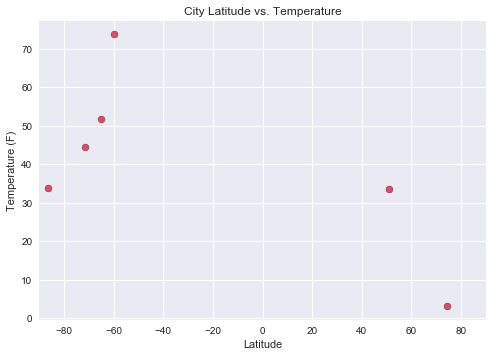

In [6]:
plt.scatter(cities["Latitude"], cities["Temperature (F)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Temperature")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

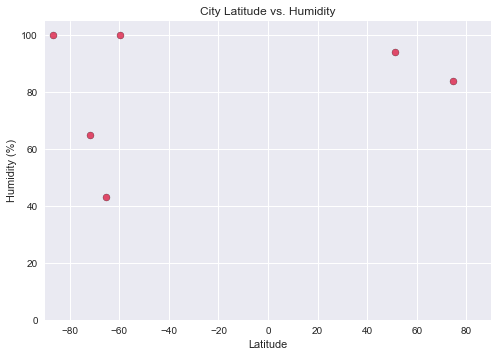

In [7]:
plt.scatter(cities["Latitude"], cities["Humidity (%)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(0,105)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

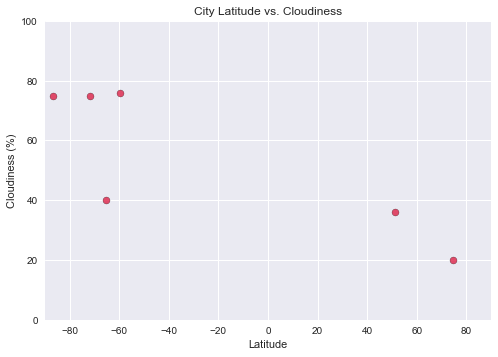

In [8]:
plt.scatter(cities["Latitude"], cities["Cloudiness (%)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

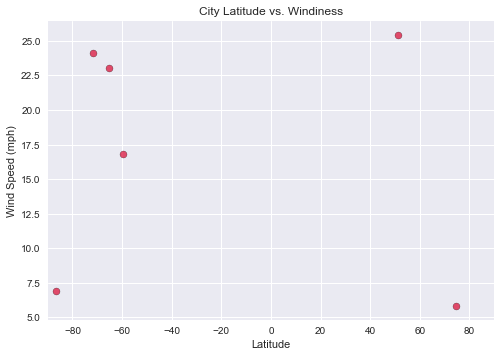

In [9]:
plt.scatter(cities["Latitude"], cities["Wind Speed (mph)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Windiness")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()